In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as  plt
import gc
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

2024-04-16 21:04:09.839302: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 21:04:09.839406: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 21:04:09.955995: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
!pip install pandas
!pip install imbalanced-learn
!pip install scikeras[tensorflow]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 88.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 50.3 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found exis

In [3]:
!chmod +x /kaggle/input/classification/download.sh
!source /kaggle/input/classification/download.sh

chmod: changing permissions of '/kaggle/input/classification/download.sh': Read-only file system
--2024-04-16 21:05:59--  https://uapt33090-my.sharepoint.com/:u:/g/personal/jmourao_ua_pt/EXXMICXdVaBLpsdqzqWVpXQBXzEYQnoVWnRuClkbfXk0Jg?e=fEcsdp&download=1
Resolving uapt33090-my.sharepoint.com (uapt33090-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to uapt33090-my.sharepoint.com (uapt33090-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/jmourao_ua_pt/Documents/CAA1_data/processed_data.zip?ga=1 [following]
--2024-04-16 21:06:00--  https://uapt33090-my.sharepoint.com/personal/jmourao_ua_pt/Documents/CAA1_data/processed_data.zip?ga=1
Reusing existing connection to uapt33090-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 173887511 (166M) [application/x-zip-compressed]
Saving to: 'data.zip'

data.zip            100%[===================>] 165.83M  42.4

In [4]:
def load_n_datasets(n,foldername):
    all_datasets = []
    filenames = os.listdir(foldername)
    for i in range(n):
        filename = filenames[i]
        if filename.endswith('.csv'):
            dataset = pd.read_csv(os.path.join(foldername, filename))
            all_datasets.append(dataset)
    combined_dataset = pd.concat(all_datasets, ignore_index=True)
    
    X =  combined_dataset.iloc[:,0:-1]
    y =  combined_dataset["Evaluation"].astype(int)
    combined_dataset = None
    dataset = None
    all_datasets = None
    return X,y

In [5]:
n_datasets = 2
X_chess_data,y_chess_data = load_n_datasets(n_datasets,'processed_data')

#X_chess_data, _, y_chess_data, _ = train_test_split(X_chess_data, y_chess_data, test_size=0.01, random_state=42, stratify=y_chess_data)

print(type(X_chess_data))
print(X_chess_data.shape)



<class 'pandas.core.frame.DataFrame'>
(1993542, 69)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


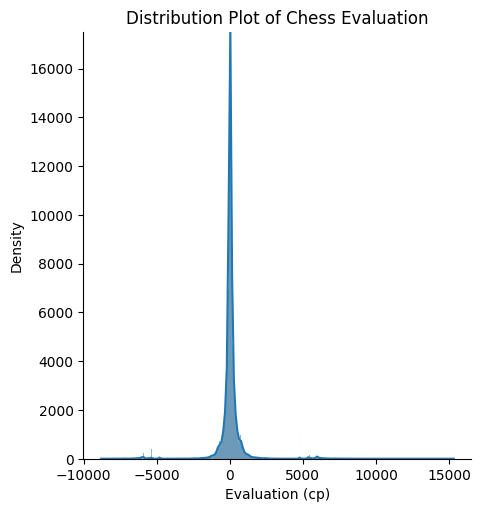

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a distribution plot of y_chess_data
sns.displot(y_chess_data, kde=True)  # Set kde=True to show the KDE curve
plt.ylim(0, 17500)
plt.xlabel('Evaluation (cp)')
plt.ylabel('Density')
plt.title('Distribution Plot of Chess Evaluation')
plt.savefig('distplot1.png')

plt.show()


/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


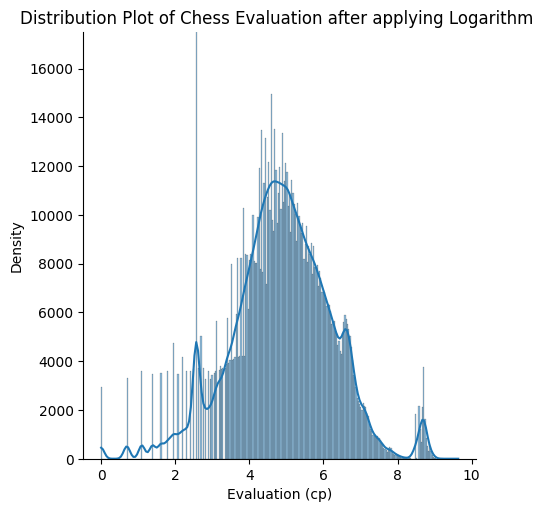

In [10]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a distribution plot of y_chess_data
sns.displot(np.log(y_chess_data), kde=True)  # Set kde=True to show the KDE curve
plt.ylim(0, 17500)
plt.xlabel('Evaluation (cp)')
plt.ylabel('Density')
plt.title('Distribution Plot of Chess Evaluation after applying Logarithm ')
plt.savefig('distplot2.png')

plt.show()


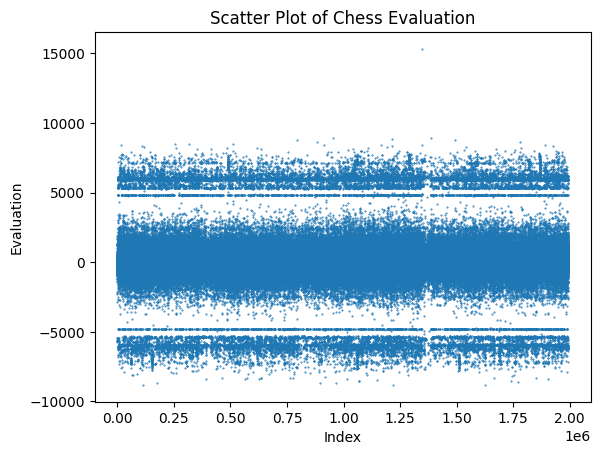

In [11]:
import matplotlib.pyplot as plt


# Creating a scatter plot
plt.scatter(range(len(y_chess_data)), y_chess_data,s=0.2)

# Adding labels and title
plt.ylabel('Evaluation')
plt.xlabel('Index')
plt.title('Scatter Plot of Chess Evaluation')
plt.savefig('regplot.png')
# Showing the plot
plt.show()
